In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df['total_amount_spent']=df['TV']+df['Radio']+df['Newspaper']

In [6]:
df.head()

,TV,Radio,Newspaper,Sales,total_amount_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


In [7]:
df.isnull().sum()

TV                    0
Radio                 0
Newspaper             0
Sales                 0
total_amount_spent    0
dtype: int64

In [8]:
import seaborn as sns


<Axes: xlabel='total_amount_spent', ylabel='Sales'>

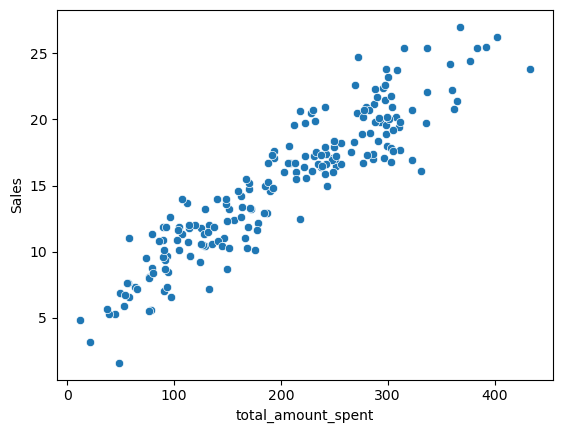

In [9]:
sns.scatterplot(data=df,x=df['total_amount_spent'],y=df['Sales'])

<Axes: xlabel='TV', ylabel='Sales'>

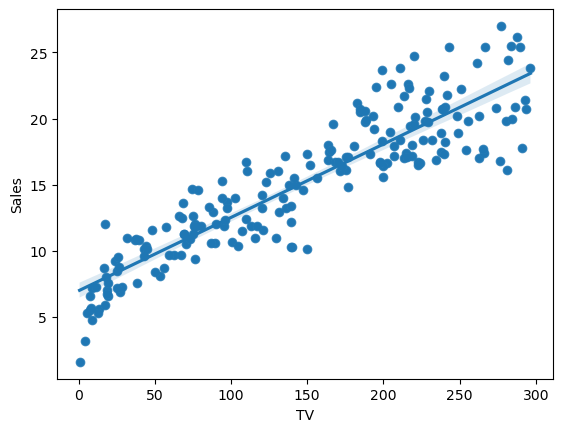

In [10]:
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
sns.regplot(data=df,x=df['TV'],y=df['Sales'])

In [11]:
# feature and target

X = df[['TV']]
y = df['Sales']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
len(X_train)

140

In [20]:
len(X_test)

60

In [21]:
len(df)

200

In [22]:
print(model.coef_)
print(model.intercept_)

[0.05454575]
6.9486832000013585


In [23]:
Y = 0.05483488*40+7.206554548173251
round(Y,2)

9.4

In [24]:
# model.predict([[40]])

In [25]:
df.head()

,TV,Radio,Newspaper,Sales,total_amount_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


In [26]:
model.predict([[40]])

E:\Anaconda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.13051332])

In [27]:
y_pred = model.predict(X_test)

In [28]:
act_predict = pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_pred.flatten()
})

act_predict.head(5)

,Actual,Predict
0,6.6,7.374140
1,20.7,19.941482
2,17.2,14.323269
3,19.4,18.823294
4,21.8,20.132392


<Axes: >

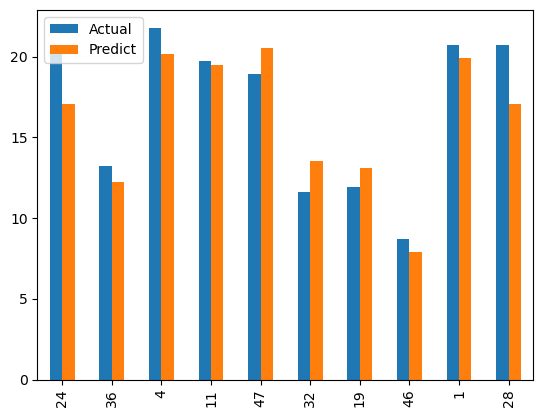

In [29]:
act_predict.sample(10).plot(kind='bar')

In [30]:
model.score(X_test,y_test)

0.792103160124566

In [31]:
# Multiple Regression

In [32]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [34]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
print(model.coef_)
print(model.intercept_)

[0.05239302 0.10752238 0.0004338 ]
4.912326442078989


In [36]:
y_pred = model.predict(X_test)

In [37]:
act_predict = pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_pred.flatten()
})

act_predict

,Actual,Predict
0,18.4,19.127479
1,7.2,10.658525
2,18.0,19.356496
3,25.5,24.315643
4,22.6,20.751037
5,14.6,15.207888
6,19.9,16.740431
7,23.7,20.670931
8,22.3,21.003164
9,12.0,10.778826


In [38]:
model.score(X_test,y_test)

0.9032402609859365

In [39]:
# save garna

import pickle

In [40]:
filename = 'saved.sav'
pickle.dump(model,open(filename, 'wb'))

In [41]:
model = pickle.load(open("saved.sav",'rb'))

In [42]:
tv = 40
radio =23
newpaper = 3
pred = model.predict([[
    tv,radio,newpaper
]])

print(pred)

[9.48236314]


E:\Anaconda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
